# Generalization with OOP: The MLBacktester Class

## Using the MLBacktester Class

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2019-01-01 22:00:00+00:00,1.146580,1.274680,1.626230
2019-01-01 22:05:00+00:00,1.146350,1.274270,1.626170
2019-01-01 22:10:00+00:00,1.146320,1.274760,1.626290
2019-01-01 22:15:00+00:00,1.146320,1.274770,1.626290
2019-01-01 22:20:00+00:00,1.146530,1.274760,1.625620
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,1.335140,1.617190
2020-08-30 23:40:00+00:00,1.191240,1.335250,1.616890
2020-08-30 23:45:00+00:00,1.191515,1.335515,1.616870


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124056 entries, 2019-01-01 22:00:00+00:00 to 2020-08-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EURUSD  123350 non-null  float64
 1   GBPUSD  123169 non-null  float64
 2   EURAUD  123742 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [4]:
import MLBacktester as MLB

### EURUSD

In [5]:
symbol = "EURUSD"

In [6]:
ptc = 0.00007 * 0

In [7]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", ptc)

In [8]:
ml

MLBacktester(symbol = EURUSD, start = 2019-01-01, end = 2020-08-31, tc = 0.0)

In [9]:
ml.data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080
2020-08-30 23:40:00+00:00,1.191240,0.000290
2020-08-30 23:45:00+00:00,1.191515,0.000231


In [10]:
ml.test_strategy(train_ratio = 0.7, lags = 5)

(1.349309, 0.279355)

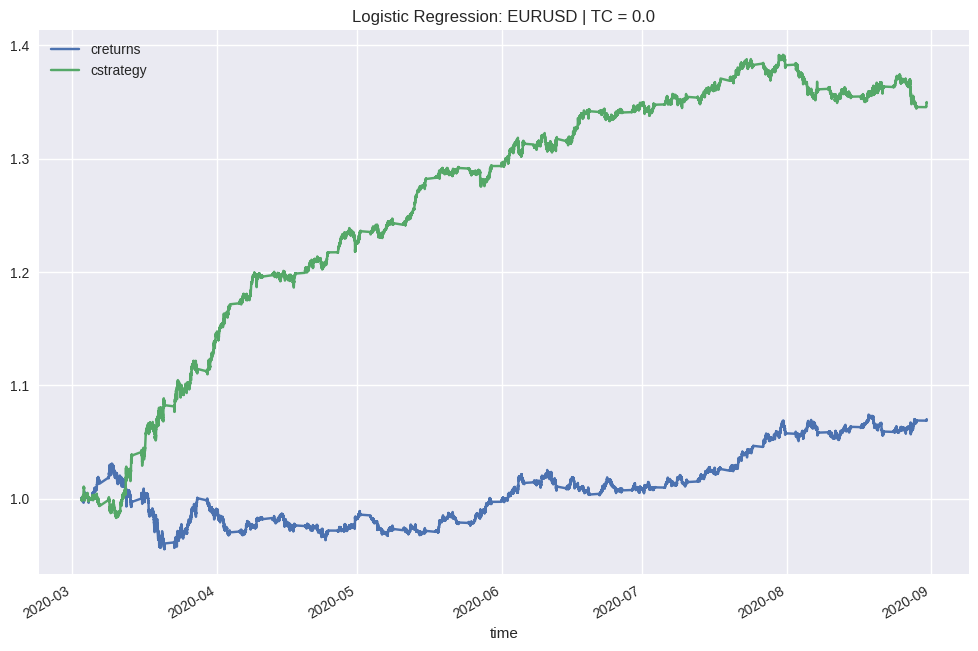

In [11]:
ml.plot_results()

In [12]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,
2020-03-03 00:20:00+00:00,1.113645,-0.000139,-1.044778,-0.680691,-1.340053,0.138070,0.297270,1.0,-0.000139,0.0,0.999861,0.999861
2020-03-03 00:25:00+00:00,1.113745,0.000090,-0.703667,-1.044788,-0.680713,-1.340050,0.138093,1.0,0.000090,0.0,0.999951,0.999951
2020-03-03 00:30:00+00:00,1.113755,0.000009,0.456737,-0.703678,-1.044813,-0.680710,-1.340026,1.0,0.000009,0.0,0.999960,0.999960
2020-03-03 00:35:00+00:00,1.113770,0.000013,0.047174,0.456720,-0.703700,-1.044810,-0.680687,1.0,0.000013,0.0,0.999973,0.999973
2020-03-03 00:40:00+00:00,1.113450,-0.000287,0.069925,0.047160,0.456710,-0.703697,-1.044787,1.0,-0.000287,0.0,0.999686,0.999686
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.466396,1.512378,0.235739,0.001643,-0.764433,1.0,-0.000080,2.0,1.069218,1.349456
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.402603,-0.466408,1.512377,0.235741,0.001666,1.0,0.000290,0.0,1.069528,1.349847
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.469664,-0.402616,-0.466427,1.512380,0.235764,-1.0,-0.000231,2.0,1.069775,1.349535


__The optimal Number of Lags__

In [13]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (1.282642, 0.213307)
2 (1.260498, 0.191192)
3 (1.228282, 0.158693)
4 (1.334458, 0.264725)
5 (1.349309, 0.279355)
6 (1.289346, 0.219243)
7 (1.282049, 0.212042)
8 (1.303185, 0.233188)
9 (1.3462, 0.276217)
10 (1.314879, 0.244588)
11 (1.332232, 0.26185)
12 (1.329267, 0.258822)
13 (1.318944, 0.248466)
14 (1.257105, 0.186458)
15 (1.290008, 0.219256)
16 (1.297938, 0.226613)
17 (1.292853, 0.221413)
18 (1.327898, 0.25692)
19 (1.34056, 0.269711)
20 (1.361615, 0.290704)


In [14]:
ml.results.trades.value_counts()

trades
0.0    23263
2.0    13723
Name: count, dtype: int64

### EURAUD

In [15]:
symbol = "EURAUD"

In [16]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", 0)

In [17]:
ml.test_strategy(train_ratio = 0.7, lags = 15)

(1.717154, 0.768368)

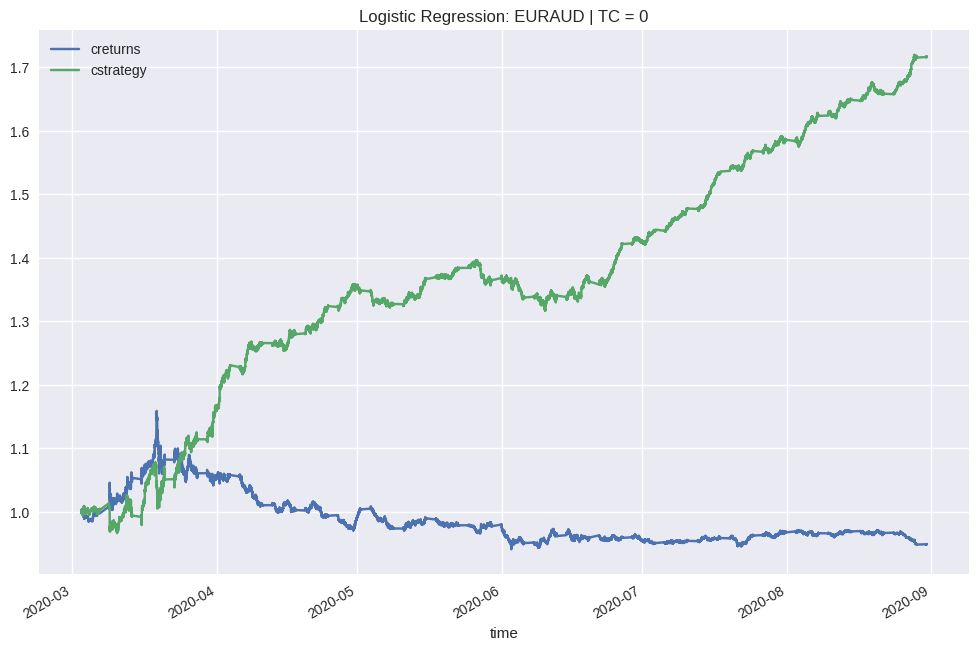

In [18]:
ml.plot_results()

__The optimal Number of Lags__

In [19]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (1.618959, 0.669992)
2 (1.716888, 0.767907)
3 (1.688469, 0.738861)
4 (1.724796, 0.775748)
5 (1.580015, 0.630681)
6 (1.552084, 0.603064)
7 (1.598368, 0.649225)
8 (1.59297, 0.644212)
9 (1.671134, 0.722615)
10 (1.678289, 0.728932)
11 (1.743925, 0.794683)
12 (1.796364, 0.847291)
13 (1.746722, 0.797919)
14 (1.85507, 0.906329)
15 (1.717154, 0.768368)
16 (1.74043, 0.791811)
17 (1.705563, 0.756991)
18 (1.752607, 0.80381)
19 (1.730026, 0.780883)
20 (1.735845, 0.786101)


In [20]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag16,lag17,lag18,lag19,lag20,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,
2020-03-02 23:55:00+00:00,1.701685,-0.000482,-2.436979,-1.399182,-0.914437,0.189478,0.673899,-0.182257,0.245863,1.091005,...,-1.163292,2.264135,-2.539139,-0.058540,-1.591168,1.0,-0.000482,0.0,0.999518,0.999518
2020-03-03 00:00:00+00:00,1.703020,0.000784,-1.851825,-2.436977,-1.399217,-0.914447,0.189483,0.673898,-0.182244,0.245868,...,1.271709,-1.163255,2.264292,-2.539206,-0.058532,1.0,0.000784,0.0,1.000302,1.000302
2020-03-03 00:05:00+00:00,1.703940,0.000540,3.009009,-1.851824,-2.437050,-1.399250,-0.914446,0.189479,0.673921,-0.182237,...,-0.498113,1.271745,-1.163405,2.264308,-2.539203,-1.0,-0.000540,2.0,1.000843,0.999762
2020-03-03 00:10:00+00:00,1.703895,-0.000026,2.071612,3.009010,-1.851875,-2.437131,-1.399251,-0.914456,0.189497,0.673925,...,1.553163,-0.498077,1.271814,-1.163449,2.264321,-1.0,0.000026,0.0,1.000816,0.999789
2020-03-03 00:15:00+00:00,1.703560,-0.000197,-0.103457,2.071613,3.009135,-1.851929,-2.437137,-1.399263,-0.914451,0.189502,...,0.966785,1.553200,-0.498167,1.271812,-1.163442,-1.0,0.000197,0.0,1.000620,0.999985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.617190,-0.000108,0.152259,-0.168235,0.021704,0.045480,0.461005,0.377940,-0.322574,0.746086,...,0.888849,-0.429816,-0.548648,-0.988061,-1.130281,-1.0,0.000108,0.0,0.949889,1.735861
2020-08-30 23:40:00+00:00,1.616890,-0.000186,-0.417525,0.152260,-0.168225,0.021738,0.045485,0.461002,0.377960,-0.322566,...,1.363646,0.888885,-0.429900,-0.548682,-0.988055,1.0,-0.000186,2.0,0.949712,1.735539
2020-08-30 23:45:00+00:00,1.616870,-0.000012,-0.714396,-0.417524,0.152282,-0.168201,0.021742,0.045480,0.461023,0.377965,...,0.365939,1.363683,0.888920,-0.429931,-0.548674,1.0,-0.000012,0.0,0.949701,1.735518


In [21]:
hits = np.sign(ml.results.returns * ml.results.pred).value_counts()
hits

 1.0    19238
-1.0    17724
 0.0      142
Name: count, dtype: int64

In [22]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5184885726606295